In [28]:
from google.colab import drive
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef, accuracy_score 
import itertools
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns
SEED=42

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/cleaned_final.csv').reset_index(drop=True)

# Data


In [4]:
data2 = data.drop(columns=['Opiods Used'])
names = data2.columns.tolist()

In [5]:
SEED = 42
X_train, X_test, y_train, y_test=train_test_split(data.drop('Opiods Used', axis=1),
    data['Opiods Used'],test_size=0.2, stratify=data['Opiods Used'],
    shuffle=True,
    random_state=SEED)

#undersampling with NearMiss
SEED = 42
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [6]:
X_train_miss = pd.DataFrame(data=X_train_miss, columns= names)

In [7]:
X_train_miss.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

In [8]:
X_test.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

# LDA


LDA as PCA is a linear transformation techniques that helps to reduces the dimensionality, but LDA is more a supervised technique.

**And like PCA we need to scale our data first :**

In [9]:
scaler = StandardScaler()
scaler.fit(X_train_miss)

X_train_miss = scaler.transform(X_train_miss)
X_test = scaler.transform(X_test)

# LDA model with defaults hyperparameters

## **Perform our LDA model with the default parameters**

In [19]:
lda = LDA(solver= 'svd',n_components=1) #max that we can since its <= (nb_classes - 1)
X_train_lda = lda.fit_transform(X_train_miss, y_train_miss)
X_test_lda = lda.transform(X_test)

**Train our model and do prediction :**

In [20]:
clf = RandomForestClassifier(random_state=SEED)
clf.fit(X_train_lda, y_train_miss)

# Predicting the Test set results
y_pred = clf.predict(X_test_lda)

In [21]:
print("the MCC is :", matthews_corrcoef(y_test, y_pred))
print("the AUC is :", roc_auc_score(y_test, y_pred))
print("the accuracy is :", accuracy_score(y_test, y_pred))

the MCC is : 0.49757926263372554
the AUC is : 0.856429631181056
the accuracy is : 0.8037127584635146


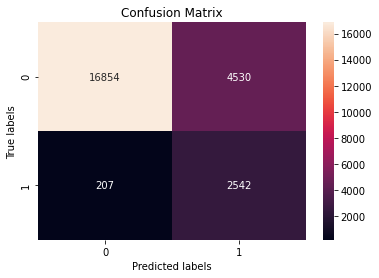

In [29]:
cm=confusion_matrix(y_test,clf.predict(X_test_lda))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

## Model with eigen solver

In [22]:
lda2 = LDA(solver= 'eigen',n_components=1) #max that we can since its <= (nb_classes - 1)
X_train_lda2 = lda2.fit_transform(X_train_miss, y_train_miss)
X_test_lda2 = lda2.transform(X_test)

In [23]:
clf2 = RandomForestClassifier(random_state=SEED)
clf2.fit(X_train_lda2, y_train_miss)

# Predicting the Test set results
y_pred2 = clf2.predict(X_test_lda2)

In [24]:
print("the MCC is :", matthews_corrcoef(y_test, y_pred2))
print("the AUC is :", roc_auc_score(y_test, y_pred2))
print("the accuracy is :", accuracy_score(y_test, y_pred2))

the MCC is : 0.49757926263372554
the AUC is : 0.856429631181056
the accuracy is : 0.8037127584635146
